# Churn
## Probabilidade de Churn
- Dataset:
    - Fonte: https://www.kaggle.com/datasets/shubh0799/churn-modelling

****
## Inputação dos dados


In [1]:
# Bibliotecas
import pandas as pd
import numpy as np

In [2]:
# Buscar dados na Web ou de arquivo CSV

# url = "https://raw.githubusercontent.com/scudilio/Churn_model/master/dataset/Churn_Modelling.csv"
url = "dataset/Churn_Modelling.csv"

df = pd.read_csv(url)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Variáveis:

- CustomerId: identificação do cliente;
- Surname: sobrenome do cliente;
- CreditScore: pontuação de credito, 0 alto risco de inadimplência e 1000 clientes com baixo risco de inadimplência;
- Geography: país que o serviço é oferecido;
- Gender: sexo do cliente;
- Age: idade do cleinte;
- Tenure: um indicativo de estabilidade no emprego, em que 0 significa pouca estabilidade e 10 muita estabilidade. 
- Balance: saldo da conta corrente;
- NumOfProducts: número de produtos bancários adquiridos;
- HasCrCard: se tem cartão de credito ou não, (Sim = 1 e Não = 0);
- IsActiveMember: se é um cliente com conta ativa, (Ativo = 1) ;
- EstimatedSalary: salário estimado;
- Exited: cliente deixou de ser cliente do banco ou não (Churn = 1) -> Alvo.

## Pré-Processamento dos dados

Etapas:

* Eliminar as variáveis que não serão utilizadas;
* Identificação de dados missing;
* Separação das variáveis categóricas, numéricas e resposta;
* Processamento variáveis categóricas;
* Processamento variáveis numéricas.

### a. Eliminar as variáveis que não serão utilizadas

Remove variáveis que não trazem informações relevantes para entender o Churn de clientes.

In [3]:
df1 = df.drop(columns = ['RowNumber','CustomerId','Surname'])
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### b. Identificando dados faltantes

In [4]:
# Contando número de observações faltantes no dataset para cada variável
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### c. Separando as variáveis

Separa variável alvo ('Exited')


In [5]:
# Criando variaveis independentes e dependentes
y = df1['Exited']
X = df1.copy()
X = df1.drop('Exited',axis = 1)
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


#### Separando as variáveis numéricas e categóricas

Tipos diferentes de variáveis passam por processamentos diferentes.

- Variáveis numéricas:
    - Contínuas:
        - assumem valores na reta real, como a variável 'Salário estimado'
    - Discreta:
        - assumem valores inteiros, como a variável 'Número de produtos'
- Variáveis categóricas:
    - Nominais:
        - não tem nenhuma ordem envolvida, como a variável 'Sexo'
    - Ordinais:
        - quando temos uma ordem envolvida, como a variável 'Grau de escolaridade' 



In [6]:
# Variáveis Continuas
x_cont = ['CreditScore','Balance','Age','EstimatedSalary','Tenure']
x_cont

['CreditScore', 'Balance', 'Age', 'EstimatedSalary', 'Tenure']

In [7]:
# Categorização da variável tenure, 0= 0,1,2 (ruim); 1=3,4,5 (regular); 2=6,7,8(bom), 3=9,10 (ótimo)
#X['Tenure']=pd.cut(df.Tenure,bins=[0,2,5,8,10],labels=[0,1,2,3]); nao melhorou 

In [8]:
# Variáveis Categóricas
x_cat = list(set(X)-set(x_cont))
x_cat
x_dummies = X[x_cat]
x_dummies

,NumOfProducts,HasCrCard,Gender,Geography,IsActiveMember
0,1,1,Female,France,1
1,1,0,Female,Spain,1
2,3,1,Female,France,0
3,2,0,Female,France,0
4,1,1,Female,Spain,1
...,...,...,...,...,...
9995,2,1,Male,France,0
9996,1,1,Male,France,1
9997,1,0,Female,France,1
9998,2,1,Male,Germany,0


### d. Processamento das variáveis categóricas

Para as variáveis categóricas com apenas duas classes utilizaremos a função Label Encoder para converte colunas categóricas em numéricas simplesmente atribuindo números inteiros a valores distintos.


In [9]:
## Substituindo a variável sexo para 0 e 1

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender']) 
X.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10
5,645,Spain,1,44,8,113755.78,2,1,0,149756.71
6,822,France,1,50,7,0.00,2,1,1,10062.80
7,376,Germany,0,29,4,115046.74,4,1,0,119346.88
8,501,France,1,44,4,142051.07,2,0,1,74940.50
9,684,France,1,27,2,134603.88,1,1,1,71725.73


Para as variáveis categóricas com mais categorias, utilizaremos o método get_dummies(). Esse método transforma uma variável em variável dummy, ou seja, ele cria novas colunas de variáveis transformando a variável em binária, ou seja, atribui 0 e 1.

Por exemplo, a variável país possuí três categorias, França, Espanha e Alemanha. A função get_dummies() transforma cada categoria em uma nova variável binária, ou seja, 
* Variável França: se o cliente for da França 1 e 0 caso contrário.
* Variável Alemanha: se o cliente for da Alemanha 1 e 0 caso contrário.
* Variável Espanha; se o cliente for da Espanha 1 e 0 caso contrário.


In [10]:
x_final = pd.get_dummies(data = X, columns=['Geography','NumOfProducts'])
x_final

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,0,42,2,0.00,1,1,101348.88,1,0,0,1,0,0,0
1,608,0,41,1,83807.86,0,1,112542.58,0,0,1,1,0,0,0
2,502,0,42,8,159660.80,1,0,113931.57,1,0,0,0,0,1,0
3,699,0,39,1,0.00,0,0,93826.63,1,0,0,0,1,0,0
4,850,0,43,2,125510.82,1,1,79084.10,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,1,0,96270.64,1,0,0,0,1,0,0
9996,516,1,35,10,57369.61,1,1,101699.77,1,0,0,1,0,0,0
9997,709,0,36,7,0.00,0,1,42085.58,1,0,0,1,0,0,0
9998,772,1,42,3,75075.31,1,0,92888.52,0,1,0,0,1,0,0


### e. Variáveis Numéricas

Observe que as variáveis numéricas Balance, Estimated Salary, Age e Credit Score estão em diferentes escalas e isso pode causar problemas no treinamento dos modelos de machine learning.


Para resolver esse problemas utilizaremos o método MiniMax para padronizar as variáveis contínuas, ou seja, vamos deixar todas as variáveis contínuas numa escala entre 0 e 1.


O método MiniMax é definido como 

$$ valor.padronizado = {valor — Coluna.min \over Coluna.max — Coluna.min} $$



In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_final[x_cont] = scaler.fit_transform(x_final[x_cont])
x_final[x_cont]

,CreditScore,Balance,Age,EstimatedSalary,Tenure
0,0.538,0.000000,0.324324,0.506735,0.2
1,0.516,0.334031,0.310811,0.562709,0.1
2,0.304,0.636357,0.324324,0.569654,0.8
3,0.698,0.000000,0.283784,0.469120,0.1
4,1.000,0.500246,0.337838,0.395400,0.2
...,...,...,...,...,...
9995,0.842,0.000000,0.283784,0.481341,0.5
9996,0.332,0.228657,0.229730,0.508490,1.0
9997,0.718,0.000000,0.243243,0.210390,0.7
9998,0.844,0.299226,0.324324,0.464429,0.3


# Modelo de Churn

- Após o pré processamento, o conjunto de dados está pronto para a modelagem.
- Prever o Churn de clientes é um problema de classificação binária, 1 se Churn e 0 caso contrário.

Será feita uma comparação entre os algoritmos:
- KNN
- Random Forest
- XGBost

### Validação Hold-Out: separação entre treino e teste

In [12]:
# Separando em dados teste e treinamento 
from sklearn.model_selection import train_test_split 

x_treino, x_teste, y_treino,y_teste  = train_test_split(x_final, y, test_size = 0.25,random_state = 1)
x_treino

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
651,0.740,1,0.459459,0.7,0.000000,1,1,0.073855,1,0,0,1,0,0,0
6560,0.454,0,0.189189,0.1,0.000000,1,0,0.049459,1,0,0,0,1,0,0
8974,0.712,0,0.337838,0.1,0.000000,1,0,0.159771,0,0,1,0,1,0,0
2348,0.948,1,0.364865,0.3,0.514988,0,0,0.300730,1,0,0,1,0,0,0
5670,0.294,1,0.189189,0.8,0.000000,1,0,0.336796,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,0.542,1,0.391892,0.7,0.427916,1,1,0.333970,0,1,0,1,0,0,0
7813,0.668,0,0.608108,0.3,0.323820,1,0,0.348192,0,1,0,1,0,0,0
905,0.644,0,0.364865,0.9,0.000000,1,1,0.460124,1,0,0,1,0,0,0
5192,0.626,0,0.283784,0.8,0.000000,1,1,0.505835,1,0,0,0,1,0,0


## KNN 

KNN ou 'k-vizinhos mais próximo' utiliza como base para prever as classes, os vizinhos mais próximo, ou seja, as observações mais próximas serão a base para prever essa nova observação.

Para facilitar o entendimento, ilustramos o método através de um exemplo, figura a seguir. O interesse é prever se o círculo verde é um triângulo vermelho ou um quadrado azul.

Primeiro, escolhemos o número de k vizinhos, k precisa ser um número **inteiro** e **impar**. Depois medimos a distância da nova observação (círculo verde) com os pontos do dataset (triângulos e quadrados). Para finalizar, ordenamos as distâncias e escolhemos os k pontos mais próximos, se a maioria dos pontos mais próximos forem da categoria 'triângulo vermelho', o ponto verde será classificado como triângulo, caso contrário será quadrado.

Observe que o método é bem influenciado pela escolha do K. Se escolhemos k=3, o círculo será classificado como triângulo vermelho. Se K=5, o círculo será classificado como quadrado azul.

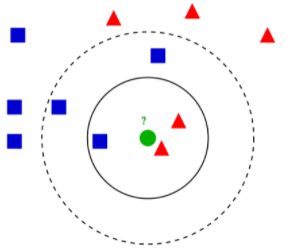


In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(x_treino, y_treino)

KNeighborsClassifier()

In [14]:
# Definindo função para gerar e plotar Matriz de Confusão

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# matriz de confusão
def matriz_confusao(model, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=model.classes_)
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()


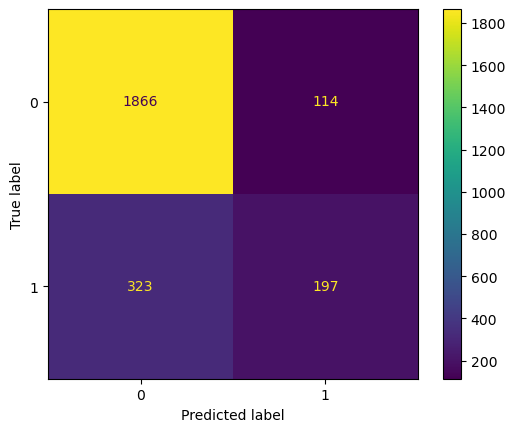

In [15]:
resultado_knn = knn_model.predict(x_teste)

matriz_confusao(knn_model, y_teste, resultado_knn)

A execução anterior foi realizada utilizado K=5, que é default da função KNN.

Porém, como o valor de k influência bastante a estimação das classe, convêm encontrar o melhor valor de K.

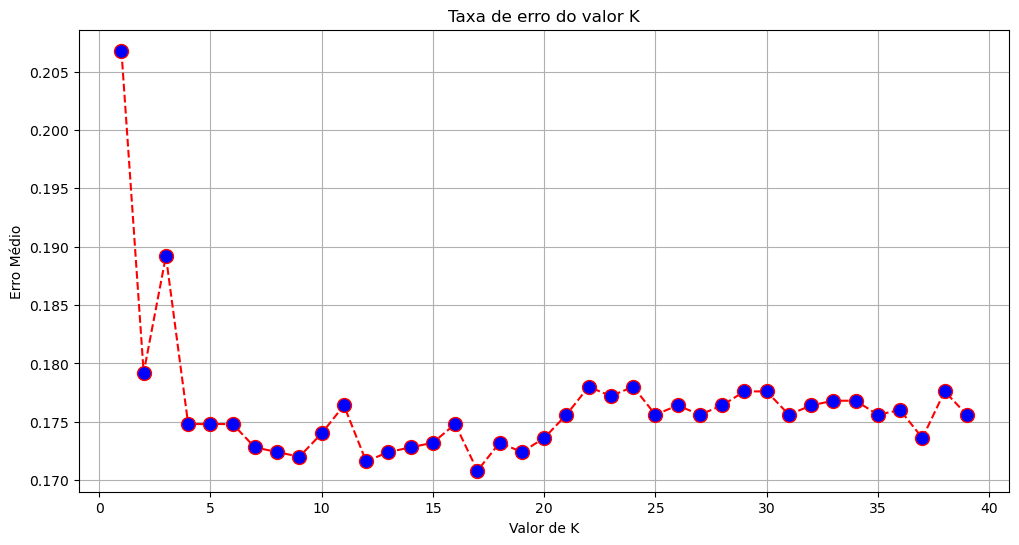

In [16]:
import matplotlib.pyplot as plt

error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_treino, y_treino)
    pred_i = knn.predict(x_teste)
    error.append(np.mean(pred_i != y_teste))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)

plt.title('Taxa de erro do valor K')
plt.xlabel('Valor de K')
plt.ylabel('Erro Médio')
plt.grid()
plt.show()

### Método Elbow

Para determinar o número ideal de clusters, temos que selecionar o valor de k no “cotovelo”, ou seja, o ponto após o qual a distorção/inércia começa a diminuir de forma linear. Assim, para os dados fornecidos, concluímos que o número ideal de clusters para os dados é 4.

In [17]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_treino, y_treino)

KNeighborsClassifier(n_neighbors=4)

* **Previsão na amostra teste e matriz de confusão**

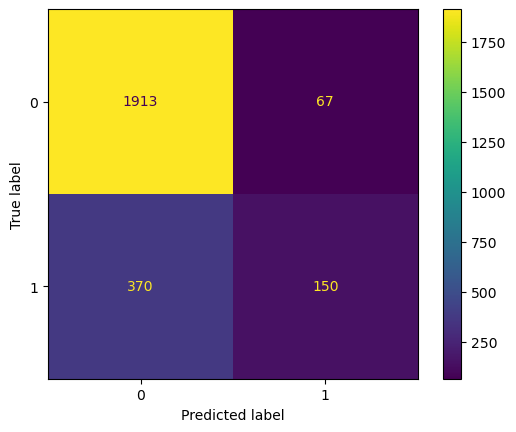

In [18]:
resultado_knn = knn.predict(x_teste)

matriz_confusao(knn_model, y_teste, resultado_knn)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_teste, resultado_knn))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1980
           1       0.69      0.29      0.41       520

    accuracy                           0.83      2500
   macro avg       0.76      0.63      0.65      2500
weighted avg       0.81      0.83      0.80      2500



In [48]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

print(f'Acurácia:  {round(accuracy_score(y_teste, resultado_knn), 3)}')
print(f'Precision: {round(precision_score(y_teste, resultado_knn), 3)}')
print(f'Recall:    {round(recall_score(y_teste, resultado_knn), 3)}')

Acurácia:  0.825
Precision: 0.691
Recall:    0.288


Observe que apesar de estar classificando bem os clientes que não deram Churn, classe 0, temos muitos falsos negativos no modelo (quando o modelo preve 0, mas o correto era 1). Ou seja, o modelo não consegue prever bem o Churn, que é o objetivo principal na análise.

Vamos tentar o modelo Random Forest para buscar um resultado melhor.

## Random Forest

In [19]:
# Importe o modelo que estamos usando 
from sklearn.ensemble import RandomForestClassifier

# Instancie o modelo com 1000 árvores de decisão 
rf_model = RandomForestClassifier(n_estimators = 1000, 
                                  random_state = 42) 

# Treine o modelo nos dados de treinamento 
rf_model.fit (x_treino, y_treino)

RandomForestClassifier(n_estimators=1000, random_state=42)

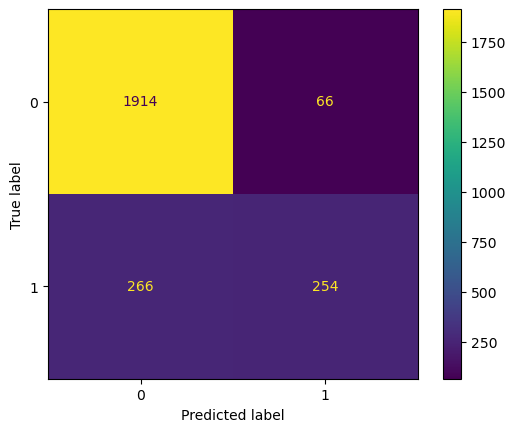

In [20]:
y_rf = rf_model.predict(x_teste)

matriz_confusao(knn_model, y_teste, y_rf)

O modelo de Random Forest conseguiu melhores resultados, porém ainda temos bastante falsos negativos. Vamos tentar um modelo mais robusto e que não sofre tanta influência em amostras desbalanceada.

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_teste, y_rf))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1980
           1       0.79      0.49      0.60       520

    accuracy                           0.87      2500
   macro avg       0.84      0.73      0.76      2500
weighted avg       0.86      0.87      0.85      2500



In [47]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

print(f'Acurácia:  {round(accuracy_score(y_teste, y_rf), 3)}')
print(f'Precision: {round(precision_score(y_teste, y_rf), 3)}')
print(f'Recall:    {round(recall_score(y_teste, y_rf), 3)}')

Acurácia:  0.867
Precision: 0.794
Recall:    0.488


In [22]:
# Analisando a importância de cada variável
rf_model.feature_importances_

feature_importances = pd.DataFrame(rf_model.feature_importances_, index = x_treino.columns, columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
Age,0.226898
EstimatedSalary,0.145037
Balance,0.143508
CreditScore,0.142218
Tenure,0.085945
NumOfProducts_2,0.055590
IsActiveMember,0.039993
NumOfProducts_3,0.038070
NumOfProducts_1,0.029783
Geography_Germany,0.021836


# XGBoost


In [40]:
#Importando as bibliotecas necessárias
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb_model = XGBClassifier(learning_rate=0.01,
                          max_depth=5,
                          n_estimators=500)

xgb_model.fit(x_treino, y_treino)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

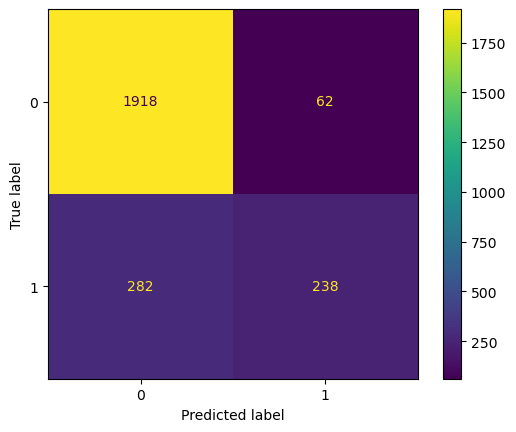

In [42]:
#fazendo as predições no dados de teste
preditos_xgb = xgb_model.predict(x_teste)

matriz_confusao(xgb_model, y_teste, preditos_xgb)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_teste, preditos_xgb))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1980
           1       0.79      0.46      0.58       520

    accuracy                           0.86      2500
   macro avg       0.83      0.71      0.75      2500
weighted avg       0.86      0.86      0.85      2500



In [45]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

print(f'Acurácia:  {round(accuracy_score(y_teste, preditos_xgb), 3)}')
print(f'Precision: {round(precision_score(y_teste, preditos_xgb), 3)}')
print(f'Recall:    {round(recall_score(y_teste, preditos_xgb), 3)}')

Acurácia:  0.862
Precision: 0.793
Recall:    0.458


Usando o XGBoost alcançamos uma acurácia de 86%. E com o Random Forest alcaçamos uma acurácia de 87%.

Abaixo seguiremos com um Ensemble usando esses dois modelos.


**Analisando a importância das variáveis:**


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

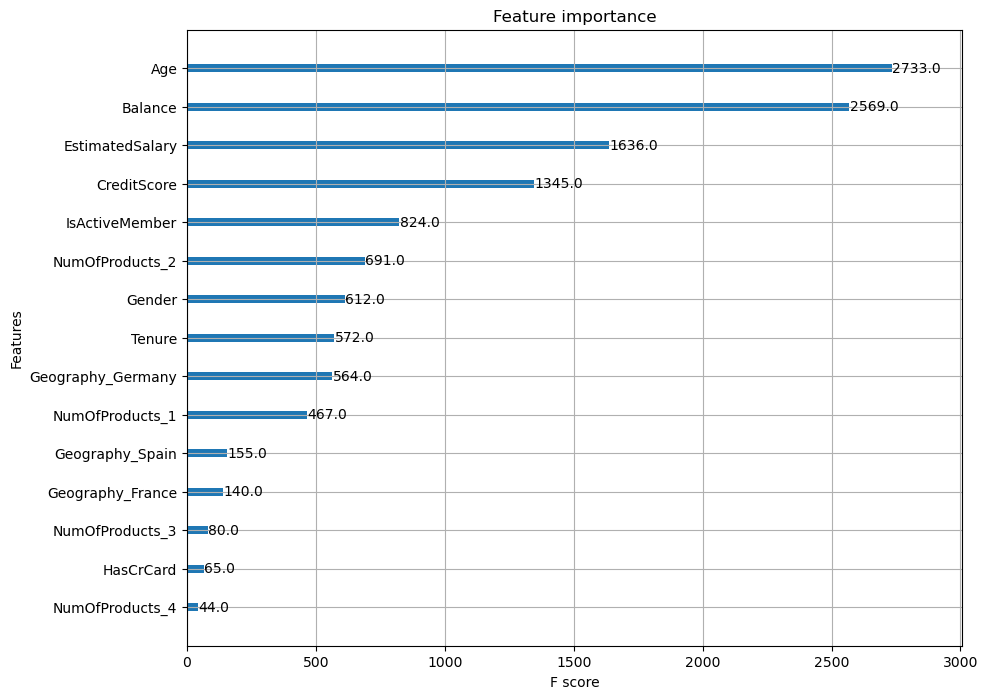

In [49]:
# Analisando a importância de cada variável
import matplotlib.pyplot as plt
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_model, ax=ax)

As variáveis mais importante para prever o Churn dos clientes foram: 
- idade
- saldo bancário
- número de produtos
- pontuação de crédito
- estimativa de salário
- membro ativo
- país

## Métodos Ensemble

Para tentar melhorar a previsão do Churn, vamos combinar os dois melhores modelos, Random Forest e XGBoost.

In [50]:
from sklearn.ensemble import VotingClassifier

# Voting Classifier with soft voting 
voto_model = VotingClassifier(estimators=[('rf', rf_model),('xgb', xgb_model)], voting='soft')
voto_model = voto_model.fit(x_treino,y_treino)

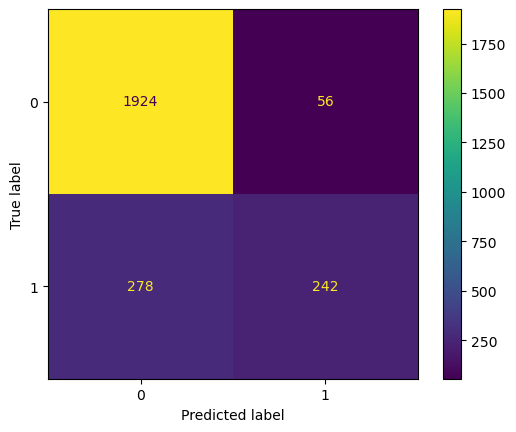

In [51]:
y_predito = voto_model.predict(x_teste)
matriz_confusao(voto_model, y_teste, y_predito)

In [52]:
print(classification_report(y_teste, y_predito))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1980
           1       0.81      0.47      0.59       520

    accuracy                           0.87      2500
   macro avg       0.84      0.72      0.76      2500
weighted avg       0.86      0.87      0.85      2500



In [53]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

print(f'Acurácia:  {round(accuracy_score(y_teste, y_predito), 3)}')
print(f'Precision: {round(precision_score(y_teste, y_predito), 3)}')
print(f'Recall:    {round(recall_score(y_teste, y_predito), 3)}')

Acurácia:  0.866
Precision: 0.812
Recall:    0.465


Relembrando o resultado anterior:

Acurácia:  0.862
Precision: 0.793
Recall:    0.458

Ao combinar os modelos observamos uma melhora nas medidas de validação, assim vamos considerar os modelos combinados como o nosso melhor modelo.

**Probabilidade de Churn**

Finalmente, a melhor maneira de usar esse modelo é atribuir probabilidade de evasão para cada cliente, criar segmentos e criar estratégias sobre isso. Para obter a probabilidade de Churn do nosso modelo, utilize o bloco de código abaixo:

In [54]:
df['proba'] = voto_model.predict_proba(x_final[x_treino.columns])[:,1]
df[['CustomerId','proba']]

,CustomerId,proba
0,15634602,0.507178
1,15647311,0.136809
2,15619304,0.964803
3,15701354,0.070376
4,15737888,0.098172
...,...,...
9995,15606229,0.020233
9996,15569892,0.054185
9997,15584532,0.441345
9998,15682355,0.100416


Esse dataframe contêm a probabilidade de cada cliente dar Churn.

Com base nisso, pode-se criar ações para se evitar a efetivação do Churn. 

# Conclusão

Melhores modelos para esse caso: XGBost e Random Forest

Variáveis mais importante: idade do cliente, o saldo bancário e o número (quantidade) de produtos.

O modelo final foi um ensemble dos modelos XGBoost e Random Forest. 

Por fim, com o dataframe gerado no finalé possível prever cos clientes com a maior chance de cancelar o serviço e, com assim tomar medidas preventivas, afim de evitar essa saída.
